# Stats & Link distances

Analysis of Wikipedia corpus

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

#from tabulate import tabulate
import pandas as pd

In [6]:
# Figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['axes.labelsize'] = 12
rcParams['legend.fontsize'] = 12

In [3]:
# Load article stats (from output of flink job)
# Columns:  * Name * Words * Headlines * OutLinks * AvgLinkDistance * InLinks
stats_cols = ('name', 'words', 'headlines', 'outlinks', 'avg_link_distance', 'inlinks')
with open('simplewiki_stats', 'rb') as f:
    stats = np.loadtxt(f, delimiter='|', 
                   dtype={
                       'names': stats_cols,  
                       'formats': ('unicode', 'int', 'int', 'int', 'float', 'int')
                   })

In [4]:
with open('dewiki_stats', 'rb') as f:
    stats_de = np.loadtxt(f, delimiter='|', 
                   dtype={
                       'names': stats_cols,  
                       'formats': ('unicode', 'int', 'int', 'int', 'float', 'int')
                   })

In [10]:

for col in stats_cols:
    if col == 'name':
        continue
    
    s = stats[col]
    print('\n### %s' % col)
    print('Mean: %f\nMin: %f\nMax: %f\nCount: %i' % (np.mean(s), np.min(s), np.max(s), len(s)))



### words
Mean: 337.331728
Min: 1.000000
Max: 39452.000000
Count: 122076

### headlines
Mean: 2.106966
Min: 0.000000
Max: 214.000000
Count: 122076

### outlinks
Mean: 24.460385
Min: 0.000000
Max: 5469.000000
Count: 122076

### avg_link_distance
Mean: nan
Min: nan
Max: nan
Count: 122076

### inlinks
Mean: 12.184262
Min: 0.000000
Max: 12657.000000
Count: 122076


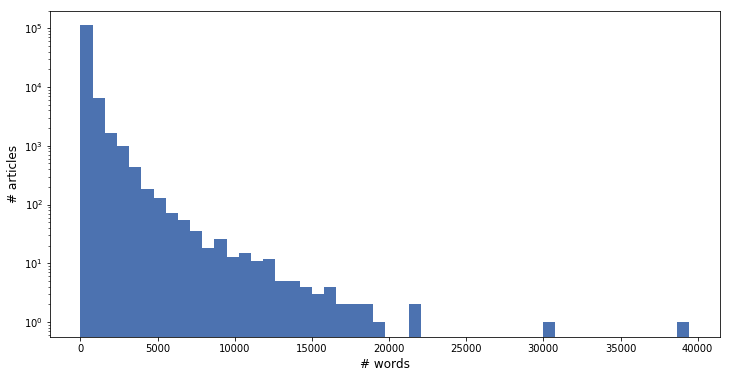

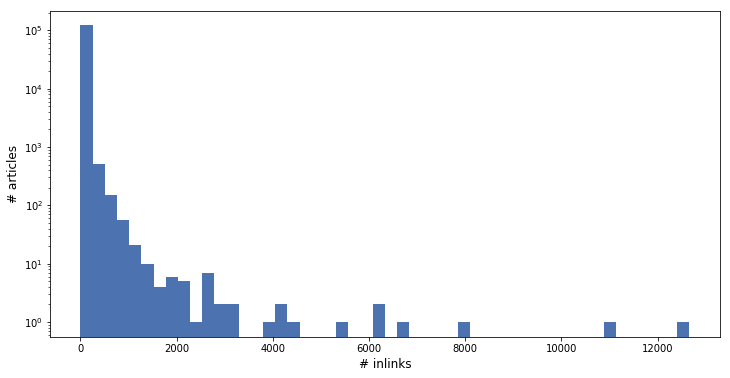

In [47]:
    
plt.hist(stats['words'], 50, log=True)
plt.xlabel('# words')
plt.ylabel('# articles')
plt.show()

plt.hist(stats['inlinks'], 50, log=True)
plt.xlabel('# inlinks')
plt.ylabel('# articles')
plt.show()

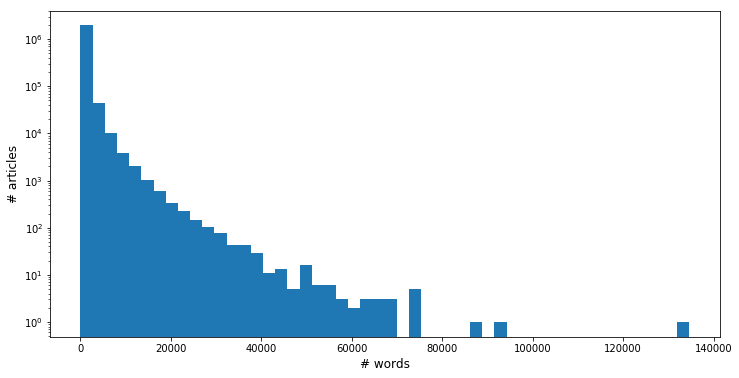

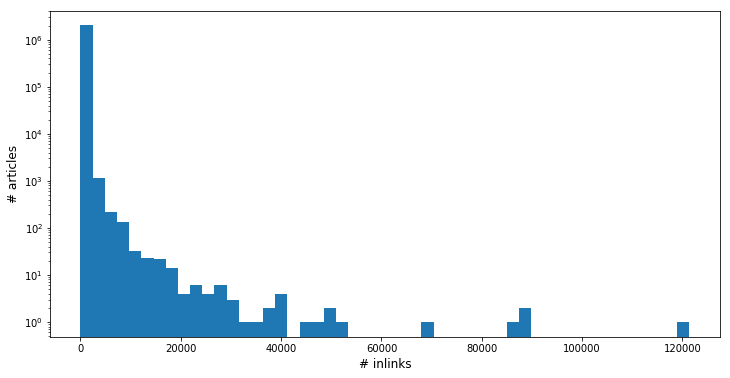

In [24]:
plt.hist(stats_de['words'], 50, log=True)
plt.xlabel('# words')
plt.ylabel('# articles')
plt.show()

plt.hist(stats_de['inlinks'], 50, log=True)
plt.xlabel('# inlinks')
plt.ylabel('# articles')
plt.show()

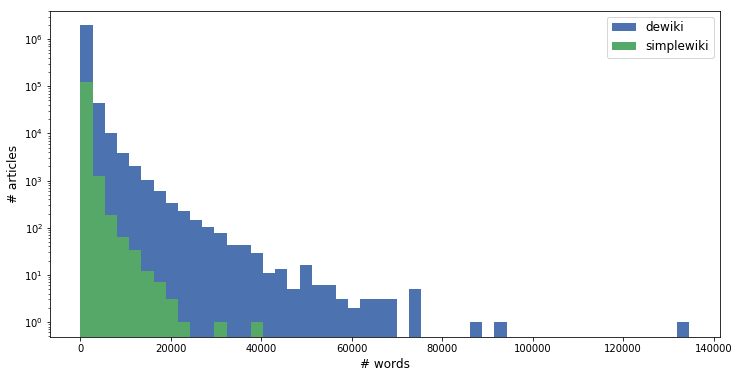

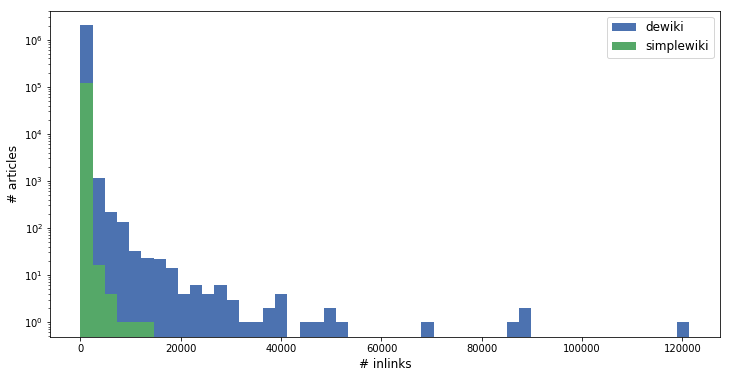

In [33]:
# simple + dewiki stats in single plot
a = stats_de['words']
b = stats['words']

plt.style.use('seaborn-deep')

bins=np.histogram(np.hstack((a,b)), bins=50)[1] #get the bin edges
plt.hist(a, bins, log=True, label='dewiki')
plt.hist(b, bins, log=True, label='simplewiki')
plt.xlabel('# words')
plt.ylabel('# articles')
plt.legend(loc='upper right')
plt.show()


a = stats_de['inlinks']
b = stats['inlinks']

plt.style.use('seaborn-deep')

bins=np.histogram(np.hstack((a,b)), bins=50)[1] #get the bin edges
plt.hist(a, bins, log=True, label='dewiki')
plt.hist(b, bins, log=True, label='simplewiki')
plt.xlabel('# inlinks')
plt.ylabel('# articles')
plt.legend(loc='upper right')
plt.show()


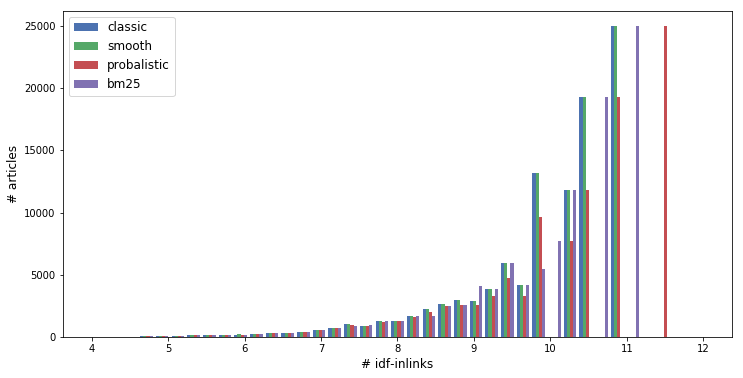

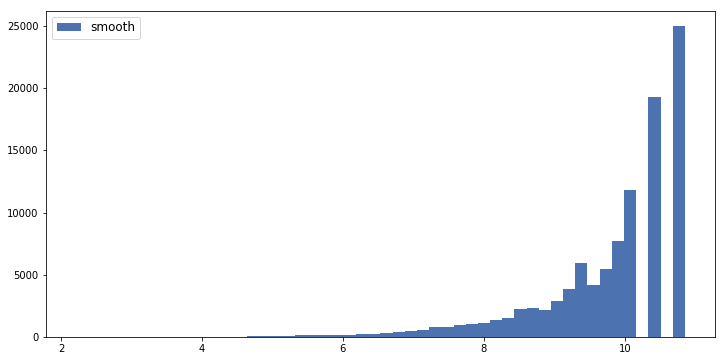

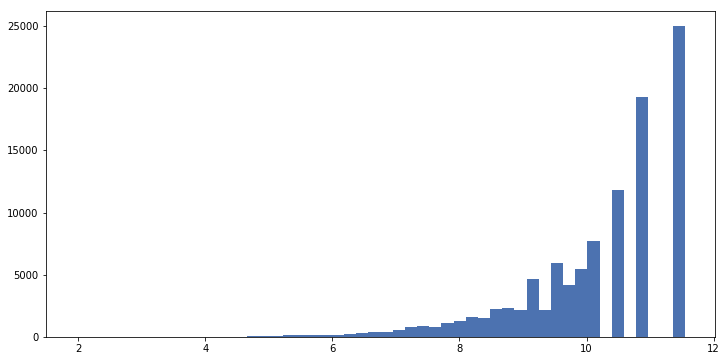

In [52]:


#plt.figure(figsize=(6,6))

inlinks = stats['inlinks'][stats['inlinks'] > 0] # all articles with at least one inlink

N = len(inlinks) #87958 # article count (CS articles)
#plt.style.use('seaborn-deep')

# Different idf schemas
classic = np.log(N / (1 + inlinks))
smooth = np.log(1 + N / (1 + inlinks))
probalistic = np.log((N - inlinks) / inlinks)
bm25 = np.log((N - inlinks + 0.5) / (inlinks + 0.5))

data = np.vstack([classic, smooth, probalistic, bm25]).T
bins = np.linspace(4, 12, 40) #30

plt.hist(data, bins, label=['classic', 'smooth', 'probalistic', 'bm25'])
         
plt.xlabel('# idf-inlinks')
plt.ylabel('# articles')
plt.legend(loc='upper left')
plt.show()

plt.hist(smooth, 50, label=['smooth']) # smooth idf
plt.legend(loc='upper left')
plt.show()

plt.hist(probalistic, 50) # probalistic idf
plt.show()

# TODO Compare with dewiki

# Conclusion: Not much difference?

In [5]:
# Link distance measures (0.5 sample)
# format: distance | count

ld_abs = np.genfromtxt ('simplewiki_link_distance_0_5.abs', delimiter='|')
ld_rel = np.genfromtxt ('simplewiki_link_distance_0_5.rel', delimiter='|')
ld_str = np.genfromtxt ('simplewiki_link_distance_0_5.str', delimiter='|')



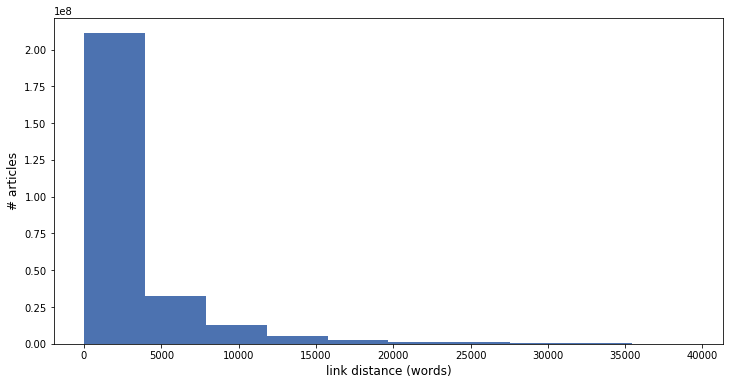

Mean: 19667.530254;	Min: 1.000000;	Max: 39373.000000


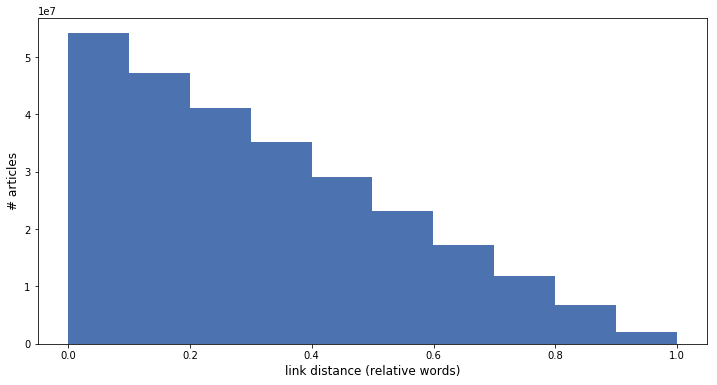

Mean: 0.498784;	Min: 0.000030;	Max: 0.999170


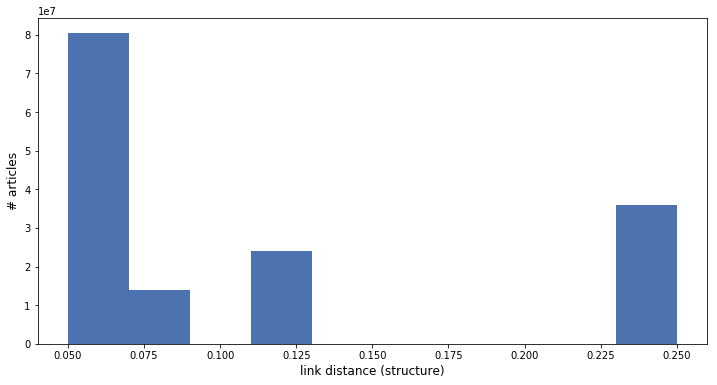

Mean: 0.127082;	Min: 0.050000;	Max: 0.250000


In [54]:
plt.hist(ld_abs[:,0], weights=ld_abs[:,1])
plt.xlabel('link distance (words)')
plt.ylabel('# articles')
plt.show()

print('Mean: %f;\tMin: %f;\tMax: %f' % (np.mean(ld_abs[:,0]), np.min(ld_abs[:,0]), np.max(ld_abs[:,0])))

plt.hist(ld_rel[:,0], weights=ld_rel[:,1])
plt.xlabel('link distance (relative words)')
plt.ylabel('# articles')
plt.show()

print('Mean: %f;\tMin: %f;\tMax: %f' % (np.mean(ld_rel[:,0]), np.min(ld_rel[:,0]), np.max(ld_rel[:,0])))

plt.hist(ld_str[:,0], weights=ld_str[:,1])
plt.xlabel('link distance (structure)')
plt.ylabel('# articles')
plt.show()

print('Mean: %f;\tMin: %f;\tMax: %f' % (np.mean(ld_str[:,0]), np.min(ld_str[:,0]), np.max(ld_str[:,0])))